In [1]:
import pandas as pd
import numpy as np

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [5]:
df.shape

(5572, 5)

In [6]:
# Data cleaning
# EDA
# Text preprocessing
# Model Building
# Evaluation
# Improvement
# Website
# Deploy

### Data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
4400,ham,Many times we lose our best ones bcoz we are
4393,ham,Baaaaaaaabe! Wake up ! I miss you ! I crave yo...
5557,ham,No. I meant the calculation is the same. That ...
499,ham,Dear i have reache room
607,ham,what I meant to say is cant wait to see u agai...


In [9]:
# Renaming the columns

df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
432,spam,Congrats! Nokia 3650 video camera phone is you...
4379,ham,Done it but internet connection v slow and can...
3155,ham,Long time. You remember me today.
1471,ham,Oh. U must have taken your REAL Valentine out ...
2661,ham,Do you know when dad will be back?


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing value
df.isnull().sum()

,0
target,0
text,0


In [14]:
# Duplicate value

df.duplicated().sum()

np.int64(403)

In [15]:
# remove duplicates

df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(5169, 2)

### EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

,count
target,
0,4516
1,653


([<matplotlib.patches.Wedge at 0x7b64a4d05190>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

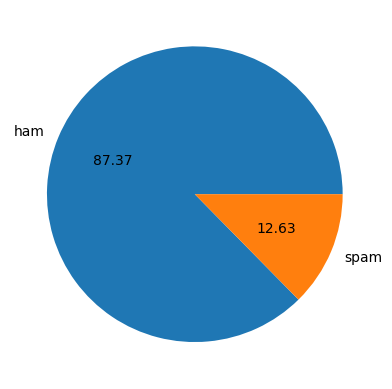

In [20]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [21]:
# data is imbalances

In [22]:
!pip install nltk

In [23]:
import nltk

In [24]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [25]:
df['num_characters']=df['text'].apply(len)

In [66]:
df.head()

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [27]:
#num of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.sample(5)

,target,text,num_characters,num_words
3296,1,Todays Voda numbers ending 5226 are selected t...,157,29
3131,0,I've been barred from all B and Q stores for l...,155,39
3993,0,I love to cuddle! I want to hold you in my str...,67,17
1051,0,Do u noe wat time e place dat sells 4d closes?,46,12
2469,0,* Am on my way,14,5


In [28]:
#num of sentences
df['num_sentence']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,target,text,num_characters,num_words,num_sentence
4088,0,"How are you, my Love ? Are you with your broth...",147,35,4
5031,0,Ok i vl..do u know i got adsense approved..,43,12,1
586,0,"I dun thk i'll quit yet... Hmmm, can go jazz ?...",110,28,2
4743,0,"\Thinking of u ;) x\""""",22,8,1
3511,0,Already one guy loving you:-.,29,8,1


In [29]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# Ham

df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# spam

df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

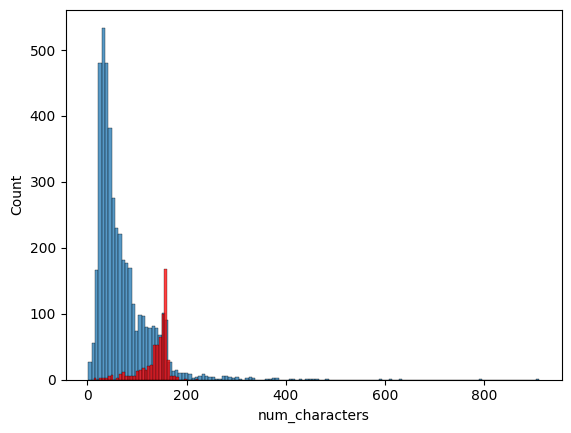

In [33]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

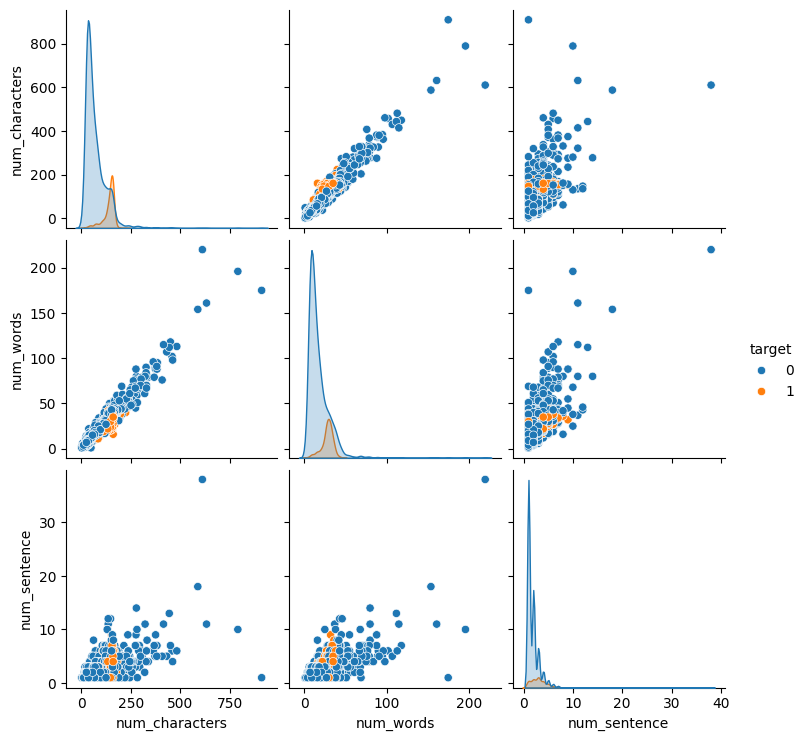

In [34]:
sns.pairplot(df,hue='target')

<Axes: >

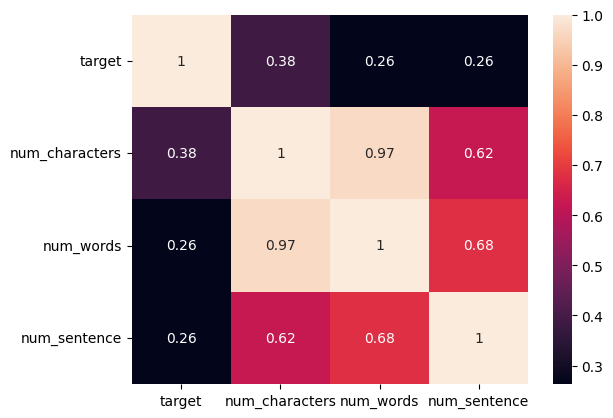

In [35]:
import seaborn as sns

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap of the correlation matrix
sns.heatmap(numeric_df.corr(), annot=True)


### Data Preprocessing
1. lowercase
2. tokenize
3. removing special char
4. removing stopwords and punc
5. stemming

In [36]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

ps.stem('loving')

'love'

In [39]:
def transform_text(text):

  #lower casing
  text=text.lower()

  #Tokenization
  text=nltk.word_tokenize(text)

  # remove spectial char
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  # Remove stopwords and punctuation
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  # stemming
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return "  ".join(y)

In [40]:
transform_text('his message is free. Welcome to the new & improved Sex & Dogging club! To unsubscribe from this service reply STOP. msgs@150p 18+only.')

'messag  free  welcom  new  improv  sex  dog  club  unsubscrib  servic  repli  stop  msg  150p'

In [41]:
df['text'][3000]

'This message is free. Welcome to the new & improved Sex & Dogging club! To unsubscribe from this service reply STOP. msgs@150p 18+only'

In [42]:
df['transformed_text']=df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

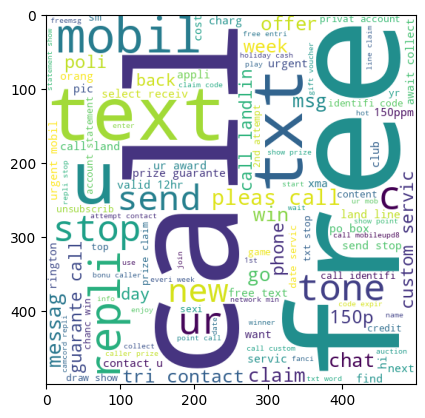

In [46]:
plt.figure()
plt.imshow(spam_wc)

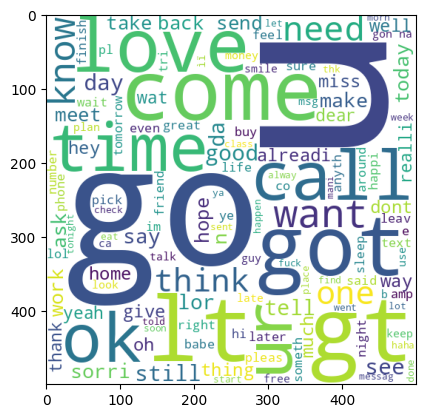

In [47]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure()
plt.imshow(ham_wc)

In [48]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [49]:
len(spam_corpus)

9939

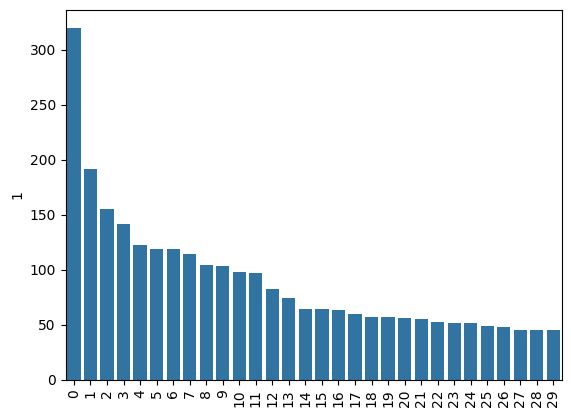

In [50]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### Model Building

In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [52]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [53]:
X.shape

(5169, 3000)

In [54]:
y=df['target'].values

In [55]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [59]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [60]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [61]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [62]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [64]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 110.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.4 MB/s eta 0:00:00


In [65]:
import gradio as gr
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Reuse the trained objects
ps = PorterStemmer()
stop_words = stopwords.words('english')

# Preprocessing function
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum()]
    text = [word for word in text if word not in stop_words]
    text = [ps.stem(word) for word in text]
    return " ".join(text)

# Load data and train model (you can also save and load this from pickle later)
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df['target'] = df['target'].map({'ham': 0, 'spam': 1})
df['transformed_text'] = df['text'].apply(transform_text)

# TF-IDF vectorizer and model training
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

mnb = MultinomialNB()
mnb.fit(X, y)

# Prediction function
def predict_spam(input_sms):
    transformed_sms = transform_text(input_sms)
    vector_input = tfidf.transform([transformed_sms])
    result = mnb.predict(vector_input)[0]
    return "Spam" if result == 1 else "Not Spam"

# Gradio UI
interface = gr.Interface(fn=predict_spam,
                         inputs=gr.Textbox(lines=4, placeholder="Enter your message here..."),
                         outputs="text",
                         title="SMS Spam Classifier")

interface.launch()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6fbcc369294a5910db.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
